In [167]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import scipy.stats as st

In [168]:
#reading excel file
data = pd.read_excel('movie_record.xlsx')
data

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0
5,A Long Way Off,2014,4.6,3,29000,500000.0,NaN,1,0,91137,112,7,1,310000.0
6,A Million Ways to Die in the West,2014,6.1,8,42600000,40000000.0,3158.0,1,0,3013011,9595,419,1020,8153000.0
7,A Most Violent Year,2014,7.1,1,5750000,20000000.0,818.0,1,2,1854103,2207,197,593,130655.0
8,A Walk Among the Tombstones,2014,6.5,10,26000000,28000000.0,2714.0,1,3,2213659,2210,419,382,125646.0
9,About Last Night,2014,6.1,8,48600000,12500000.0,2253.0,1,0,5218079,11709,532,770,21697300.0


In [169]:
#dimension data frame
data.shape

(231, 14)

In [170]:
# finding total null values present in each columns.
data.isnull().sum()

Movie                   0
Year                    0
Ratings                 0
Genre                   0
Gross                   0
Budget                  1
Screens                10
Sequel                  0
Sentiment               0
Views                   0
Likes                   0
Dislikes                0
Comments                0
Aggregate Followers    35
dtype: int64

In [171]:
# knowing the types of attribute
data.dtypes

Movie                   object
Year                     int64
Ratings                float64
Genre                    int64
Gross                    int64
Budget                 float64
Screens                float64
Sequel                   int64
Sentiment                int64
Views                    int64
Likes                    int64
Dislikes                 int64
Comments                 int64
Aggregate Followers    float64
dtype: object

### Top 15 movie which has highest rating in 2014 and 2015 year 

In [191]:
data.sort_values('Ratings').head(15)


,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers,ProfitLoss
65,Left Behind,2014,3.1,1,14000000,16000000.0,1825.0,1,0,5611593,11187,2111,7595,116800.0,-2000000.0
188,Fantastic Four,2015,4.0,1,52700000,120000000.0,3995.0,1,20,7560211,24168,3524,7139,881000.0,-67300000.0
29,Devil's Due,2014,4.0,15,15800000,7000000.0,2544.0,1,0,1844690,3728,581,729,9536.0,8800000.0
171,Fifty Shades of Grey,2015,4.2,3,166000000,40000000.0,3646.0,1,9,31859569,49900,13960,9119,946000.0,126000000.0
132,The Legend of Hercules,2014,4.2,1,18800000,70000000.0,2104.0,1,0,797229,1606,630,456,1174806.0,-51200000.0
183,Paul Blart: Mall Cop 2,2015,4.3,1,71000000,30000000.0,90.0,2,15,2389347,8809,935,892,1618000.0,41000000.0
230,The Gallows,2015,4.4,15,22600000,100000.0,2720.0,1,-5,659772,2841,431,606,NaN,22500000.0
85,Ouija,2014,4.4,15,50800000,5000000.0,2061.0,1,-4,11724815,30208,2150,4926,130000.0,45800000.0
14,Atlas Shrugged: Who Is John Galt?,2014,4.4,3,830000,5000000.0,65.0,3,0,595194,85,36,39,15112.0,-4170000.0
213,The Vatican Tapes,2015,4.5,15,1710000,8495000.0,420.0,1,-2,1364537,3824,689,772,3841.0,-6785000.0


 ```
 Observation : Interstellar has highest movie rating which is 8.7
 ``` 

### Bottom 15 movie which has Lowest rating in 2014 and 2015 year 

In [190]:
data.sort_values('Ratings', ascending=False).head(15)


,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers,ProfitLoss
55,Interstellar,2014,8.7,2,188000000,165000000.0,3561.0,1,2,5421705,16635,751,4316,1865000.0,23000000.0
166,Inside Out,2015,8.6,12,345000000,175000000.0,3946.0,1,2,1438926,4632,262,496,232000.0,170000000.0
155,Whiplash,2014,8.6,3,13100000,3300000.0,42.0,1,2,7750223,17541,631,2760,858000.0,9800000.0
174,Mad Max: Fury Road,2015,8.3,1,153000000,150000000.0,3702.0,4,-4,2732371,13030,497,1774,768700.0,3000000.0
175,Straight Outta Compton,2015,8.3,9,135000000,28000000.0,2757.0,1,5,848970,12607,237,1560,55618.0,107000000.0
158,Wild Tales,2014,8.2,8,3080000,3300000.0,4.0,1,7,697105,1023,39,429,NaN,-220000.0
45,Gone Girl,2014,8.2,3,168000000,61000000.0,3014.0,1,-11,396010,1390,58,342,20640000.0,107000000.0
212,Me and Earl and the Dying Girl,2015,8.2,8,6740000,8000000.0,34.0,1,15,4032265,18398,302,1298,2208.0,-1260000.0
46,Guardians of the Galaxy,2014,8.1,1,333000000,170000000.0,4080.0,1,0,1313548,8567,269,1285,2750000.0,163000000.0
129,The Imitation Game,2014,8.1,9,91100000,14000000.0,747.0,1,9,3047849,11748,253,1237,NaN,77100000.0


``` 
Observation : Left Behind has lowest movie ratings which is 3.1 
```

### Number of movies in 2014 and 2015

In [174]:
data.Year.value_counts()

2014    163
2015     68
Name: Year, dtype: int64

### Correlational map

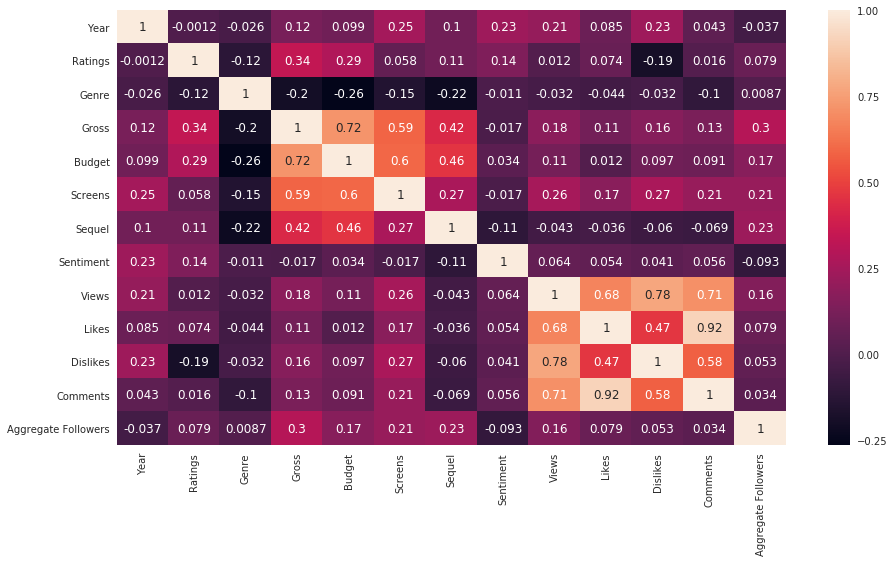

In [175]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(data.corr(), annot= True)

#### Findings:
```
1. Gross is more related to Budget and ProfitLoss than other attributes.
2. Views count is directly proportional to Likes, Dislikes and Comments.
```

### Relationship between Budget vs Screens

/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


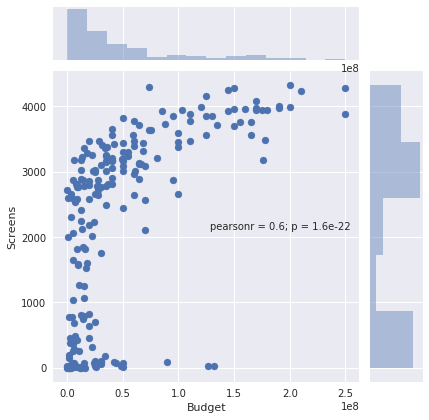

In [176]:
sns.jointplot('Budget','Screens',data = data)

#### Observation:
```
Movie having budget below 5 cr has the screen varying between 0 to 3000. But when the budget is above 5 cr, screen is also increases more than 3000.

```

### Analysing relation between Screens and Views

/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


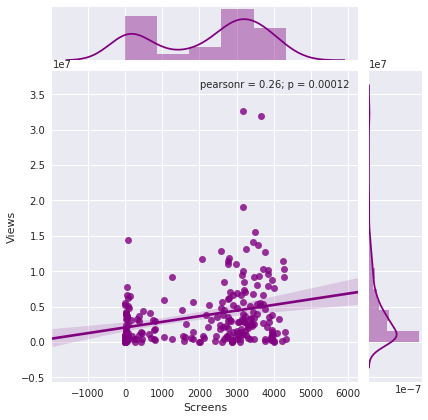

In [177]:
sns.jointplot('Screens','Views',data = data, kind = 'reg', color = 'purple')

#### Observation:
```
From the above graph, we can see that number of screens doesn't have much effect on number of views.
```

## Analysis between Gross and Budget

/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


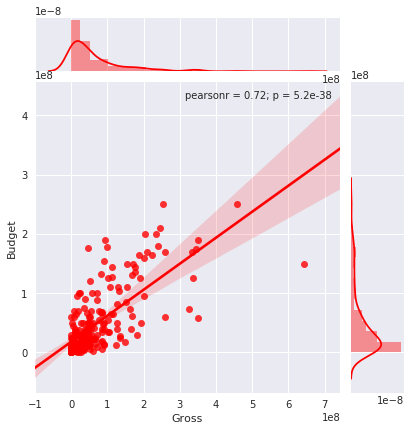

In [178]:
sns.jointplot('Gross','Budget',data = data, kind = 'reg', color = 'red')

In [179]:
# Adding one extra column which shows profit/loss
data['ProfitLoss'] = data.Gross - data.Budget

### Top 15 movie which has maximum profit

In [195]:
data.sort_values('ProfitLoss',ascending=False).head(15)

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers,ProfitLoss
163,Jurassic World,2015,7.3,1,643000000,150000000.0,4274.0,4,1,9143740,34746,1074,5107,6180000.0,493000000.0
10,American Sniper,2014,7.3,1,350000000,58800000.0,3555.0,1,4,3927600,13143,573,3134,24300.0,291200000.0
167,Minions,2015,6.6,1,325000000,74000000.0,4301.0,2,-2,1341909,1607,764,48,250000.0,251000000.0
127,The Hunger Games: Mockingjay - Part 1,2014,6.8,2,337000000,125000000.0,4151.0,3,2,3305417,14684,332,1176,31030000.0,212000000.0
164,Avengers: Age of Ultron,2015,7.8,1,458000000,250000000.0,4276.0,2,21,10366624,31552,989,3843,10070000.0,208000000.0
133,The Lego Movie,2014,7.8,12,258000000,60000000.0,3775.0,1,-2,439159,1847,105,289,4690000.0,198000000.0
166,Inside Out,2015,8.6,12,345000000,175000000.0,3946.0,1,2,1438926,4632,262,496,232000.0,170000000.0
46,Guardians of the Galaxy,2014,8.1,1,333000000,170000000.0,4080.0,1,0,1313548,8567,269,1285,2750000.0,163000000.0
165,Furious 7,2015,7.4,1,350000000,190000000.0,4004.0,7,-17,59056,330,8,39,11890000.0,160000000.0
168,Pitch Perfect 2,2015,6.7,8,183000000,29000000.0,3473.0,2,1,9214467,39824,998,1987,7336000.0,154000000.0


``` 
Observation: Jurassic world has maximum profit. 
```

### Bottom 15 movie which has maximum loss

In [194]:
data.sort_values('ProfitLoss').head(15)

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers,ProfitLoss
190,Jupiter Ascending,2015,5.5,1,47400000,176000000.0,3181.0,1,0,3920842,10535,565,1668,7460000.0,-128600000.0
179,Tomorrowland,2015,6.6,12,93200000,190000000.0,3972.0,1,1,999867,4212,66,250,1198000.0,-96800000.0
36,Edge of Tomorrow,2014,7.9,1,100000000,178000000.0,3490.0,1,0,15568277,29251,1730,6439,5610000.0,-78000000.0
99,Seventh Son,2014,5.5,1,17200000,95000000.0,2875.0,1,0,23360,36,5,5,804300.0,-77800000.0
149,Transcendence,2014,6.3,3,23000000,100000000.0,3455.0,1,0,14141585,36646,1459,6811,5987.0,-77000000.0
90,Pompeii,2014,5.6,1,23200000,100000000.0,2658.0,1,0,355563,1568,106,267,370000.0,-76800000.0
188,Fantastic Four,2015,4.0,1,52700000,120000000.0,3995.0,1,20,7560211,24168,3524,7139,881000.0,-67300000.0
181,Terminator Genisys,2015,6.8,1,89400000,155000000.0,3758.0,5,1,84870,265,13,63,3877901.0,-65600000.0
211,Blackhat,2015,5.4,3,7100000,70000000.0,2567.0,1,4,2409338,6923,340,714,1334000.0,-62900000.0
159,Winter's Tale,2014,6.2,3,22500,60000000.0,2965.0,1,0,719976,1312,76,189,1810000.0,-59977500.0


```
Observation: Jupiter Ascending has maximum loss.
```

## Relationship between Genre and Views

/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


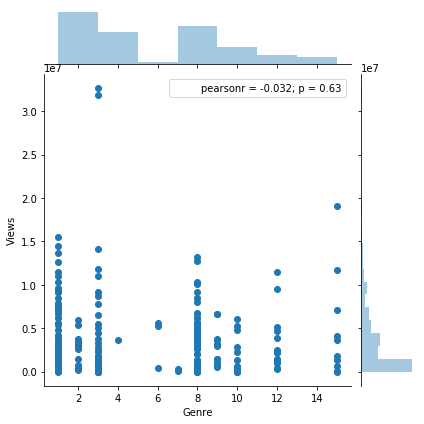

In [65]:
x = sns.jointplot('Genre','Views', data = data)

``` 
Observation: Genre 1 has the maximum number of movies and Genre 14 has the minimum number of movies.
```

/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


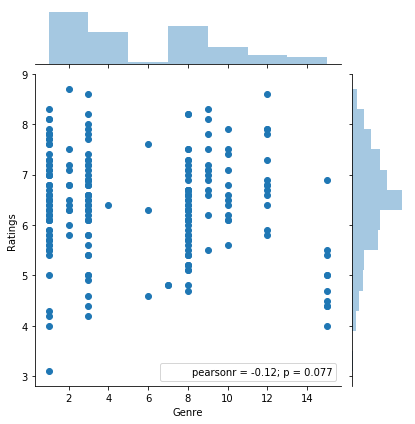

In [138]:
x = sns.jointplot('Genre','Ratings',data = data)

```
Observation: Movie asn